In [1]:
import cv2
import os
import numpy as np
from keras.models import load_model, Model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


In [2]:
def get_model(layer='fc2'):
    base_model = VGG16(weights='vgg_16_weights.h5', include_top=True)
    model = Model(inputs=base_model.input, outputs=base_model.get_layer(layer).output)
    return model

In [3]:
def get_files(path_to_files, size):
    fn_imgs = []
    files = [file for file in os.listdir(path_to_files)]
    for file in files:
        img = cv2.resize(cv2.imread(path_to_files+file), size)
        fn_imgs.append([file, img])
    return dict(fn_imgs)

In [7]:
def feature_vector(img_arr, model):
    if img_arr.shape[2] == 1:
        img_arr = img_arr.repeat(3, axis=2)

    # (1, 224, 224, 3)
    arr4d = np.expand_dims(img_arr, axis=0)  
    arr4d_pp = preprocess_input(arr4d)
    return model.predict(arr4d_pp)[0,:]

In [8]:
def feature_vectors(imgs_dict, model):
    f_vect = {}
    for fn, img in imgs_dict.items():
        f_vect[fn] = feature_vector(img, model)
    return f_vect

In [9]:
imgs_dict = get_files(path_to_files = './data/',size = (224, 224))

# Create Keras NN model.
model = get_model()

# Feed images through the model and extract feature vectors.
img_feature_vector = feature_vectors(imgs_dict, model)

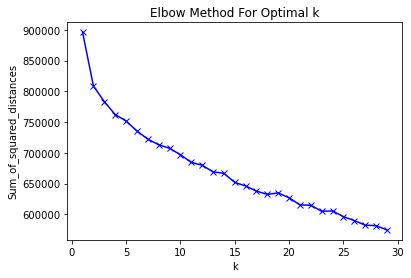

In [12]:
images = list(img_feature_vector.values())
fns = list(img_feature_vector.keys())
sum_of_squared_distances = []
K = range(1, 30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(images)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=8, init='k-means++')
kmeans.fit(images)
y_kmeans = kmeans.predict(images)
file_names = list(imgs_dict.keys())

In [15]:

n_clusters = 2
cluster_path = './cluster_2/'
path_to_files = './data/'

for c in range(0,n_clusters):
    if not os.path.exists(cluster_path+'cluster_'+str(c)):
        os.mkdir(cluster_path+'cluster_'+str(c))

for fn, cluster in zip(file_names, y_kmeans):
    image = cv2.imread(path_to_files+fn)
    cv2.imwrite(cluster_path+'cluster_'+str(cluster)+'/'+fn, image)

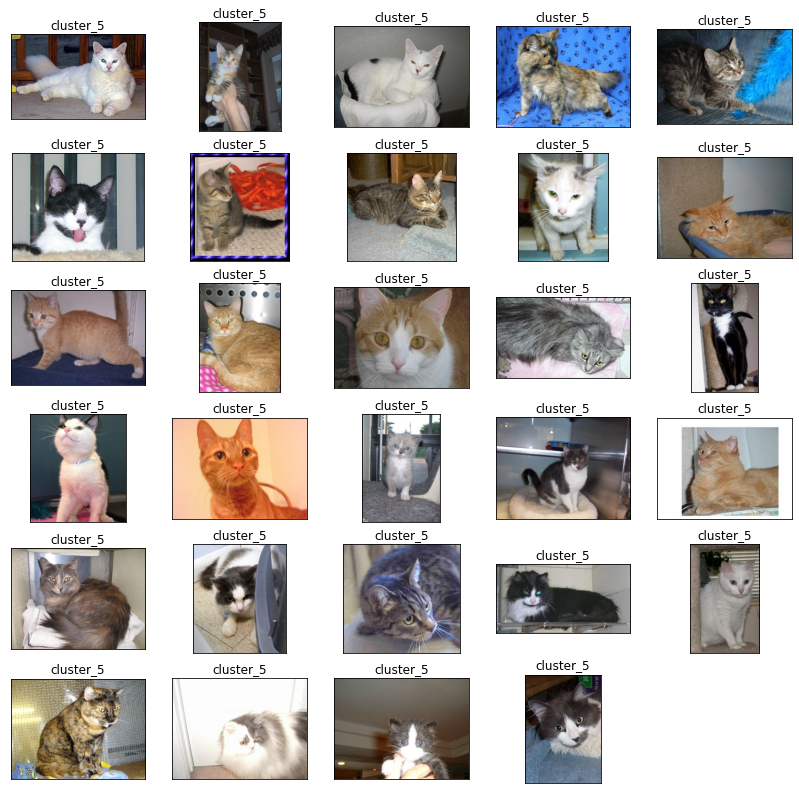

In [17]:

fig = plt.figure(figsize=(14, 14))

cluster_path = './clusters/cluster_2/'
images = [file for file in os.listdir(cluster_path)]

for cnt, data in enumerate(images[1:30]):
    #     print(data)
    y = fig.add_subplot(6, 5, cnt+1)
    img = mpimg.imread(cluster_path+data)
    y.imshow(img)
    plt.title('cluster_5')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

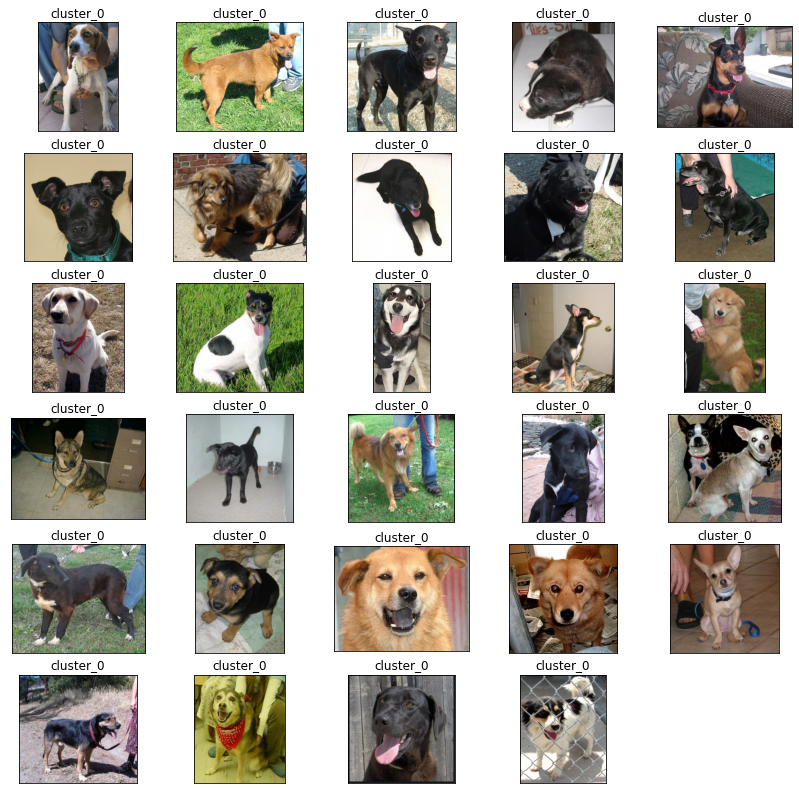

In [21]:
fig = plt.figure(figsize=(14, 14))

cluster_path = './clusters/cluster_0/'
images = [file for file in os.listdir(cluster_path)]

for cnt, data in enumerate(images[1:30]):
    #     print(data)
    y = fig.add_subplot(6, 5, cnt+1)
    img = mpimg.imread(cluster_path+data)
    y.imshow(img)
    plt.title('cluster_0')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)